In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pokemon = pd.read_csv('Pokemon.csv')
pokemon.columns = [x.replace(" ", "_") for x in pokemon.columns]
pokemon.head(5)

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp._Atk,Sp._Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
pokemon  = pokemon.drop(['Name', "Type_1" , "Type_2"] ,axis=1)
y = pokemon['Legendary']

In [7]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

X_train, X_holdout, y_train, y_holdout = train_test_split(pokemon.values, y, test_size=0.3, random_state=17)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [9]:
from sklearn.metrics import accuracy_score
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred) 

0.9416666666666667

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
knn_params = {'knn__n_neighbors': range(1, 10)}

In [11]:
knn_grid = GridSearchCV(knn_pipe, knn_params,cv=5, n_jobs=-1,verbose=True)
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    7.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=-1,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             

In [12]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 1}, 1.0)

In [13]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

1.0

In [14]:
from sklearn.metrics import confusion_matrix

y_predicted = knn_grid.predict(X_train)
cm = confusion_matrix(y_train , y_predicted)
print(cm)

[[518   0]
 [  0  42]]


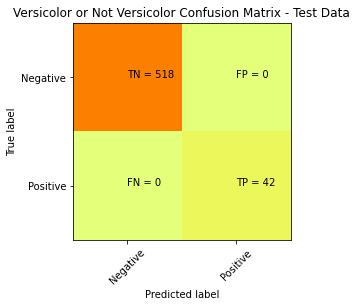

In [15]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()